# Les emprunts dans les bibliothèques parisiennes


![Image livres arbre](https://www.letournepage.com/wp-content/uploads/2019/12/2019.11-Lire-Local.arbre2_-1072x536-1024x512.png)

**L'objectif de ce petit projet sera l'étude des titres les plus empruntés dans les bibliothèques parisienne.**

## Importation des bibliothèques et données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import HTML


J'importe les librairies dont j'aurai a priori besoin.

In [2]:
df1= pd.read_excel('emprunts.xlsx')

J'importe ma dataframe et j'en visualise les premières lignes. Il s'agit d'une table qui présente les ouvrages les plus empruntés dans les bibliothèques parisiennes sur la premère moitié de 2018.

In [3]:
df1.head()

,Rang,Type de documnt,Prêts,Titre,Auteur,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
0,1,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,2,Livre jeunesse,1101,Lili a trop honte,"Saint-Mars, Dominique de",54,7337,1496,136
2,3,Livre jeunesse,1079,Max en a marre de sa soeur,"Saint-Mars, Dominique de",51,2409,1173,117
3,4,Livre jeunesse,1075,Max et Lili cherchent leur métier,"Saint-Mars, Dominique de",53,2987,1631,120
4,5,Livre jeunesse,1055,Max et Lili en ont marre de se dépêcher,"Saint-Mars, Dominique de",51,7526,1468,135


## Problématique

**Que nous révèle cette base de donnée sur les comportemeents des parisiens?**

## Mise en forme et découverte

In [4]:
df1.describe()

,Rang,Prêts,Nombre de localisations,Nombre de prêt total,Nombre de prêts 2017,Nombre d'exemplaires
count,825.00000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,413.00000,513.843636,44.191515,3390.007273,614.179394,67.513939
std,238.30128,161.762392,6.399498,2082.195108,294.577053,21.965498
min,1.00000,344.000000,3.000000,354.000000,0.000000,7.000000
25%,207.00000,388.000000,41.000000,1633.000000,463.000000,52.000000
50%,413.00000,459.000000,45.000000,3226.000000,580.000000,61.000000
75%,619.00000,602.000000,49.000000,4845.000000,777.000000,80.000000
max,825.00000,1189.000000,57.000000,9743.000000,1799.000000,220.000000


Pour commencer une petite description de la table de données avant de poursuivre la mise en forme de la dataframe.

L'objectif de cette section est de réaliser quelques modifications d'usage pour faciliter l'exploitation future de la dataframe à savoir changements des noms de colonne, changement d'indexation éventuel etc.

In [5]:
df1.columns

Index(['Rang', 'Type de documnt', 'Prêts', 'Titre', 'Auteur',
       'Nombre de localisations', 'Nombre de prêt total',
       'Nombre de prêts 2017', 'Nombre d'exemplaires'],
      dtype='object')

In [6]:
df2= df1.rename(columns={'Nombre de localisations':"nb_localisations",'Type de documnt':"type",'Nombre de prêt total':"nb_prêts_tot","Nombre d'exemplaires":"nb_exemplaires",'Nombre de prêts 2017':"nb_prêts_2017"})

Je renomme mes colonnes pour plus de clarté/facilité d'appels.

In [7]:
df2.head(10)

,Rang,type,Prêts,Titre,Auteur,nb_localisations,nb_prêts_tot,nb_prêts_2017,nb_exemplaires
0,1,Livre jeunesse,1189,Max se trouve trop petit,"Saint-Mars, Dominique de",53,3471,1799,135
1,2,Livre jeunesse,1101,Lili a trop honte,"Saint-Mars, Dominique de",54,7337,1496,136
2,3,Livre jeunesse,1079,Max en a marre de sa soeur,"Saint-Mars, Dominique de",51,2409,1173,117
3,4,Livre jeunesse,1075,Max et Lili cherchent leur métier,"Saint-Mars, Dominique de",53,2987,1631,120
4,5,Livre jeunesse,1055,Max et Lili en ont marre de se dépêcher,"Saint-Mars, Dominique de",51,7526,1468,135
5,6,Livre jeunesse,1053,Lili est harcelée à l'école,"Saint-Mars, Dominique de",51,8467,1379,124
6,7,Livre jeunesse,1050,Max et Lili ont des pouvoirs magiques,"Saint-Mars, Dominique de",52,9743,1555,134
7,8,Livre jeunesse,1032,"Va-t'en, grand monstre vert !","Emberley, Ed",54,7659,1334,220
8,9,Livre jeunesse,1022,Max et Lili veulent être populaires,"Saint-Mars, Dominique de",54,6732,1494,133
9,10,Livre jeunesse,1020,Max et Lili ont du mal à se concentrer,"Saint-Mars, Dominique de",48,1493,402,112


In [8]:
df2["previous"] = df2.index

In [9]:
len(df2.Titre.unique())

821

In [10]:
df2.shape

(825, 10)

J'ai voulu changer les index de ma dataframe pour les remplacer par les titres. Pour ce faire, j'ai d'abord créé une colonne previous pour stocker les anciens indexs puis j'ai regardé le nombre de titres en comparaison avec le nombre de lignes de ma dataframe. Comme il y a plus de lignes que de titres uniques, cela signifie donc qu'il y a des doublons au sein des titres. Je me contente donc de l'indexation par défaut pour éviter des éventuels conflits d'appels futurs.

J'ai constaté plusieurs problèmes dans les entrées des auteurs. Tout d'abord, toutes les oeuvres n'ont pas d'auteurs ce qui rend compliqué l'analyse par auteur de la dataframe. Je commence donc par remplir les trous.

In [11]:
df2.Auteur = df2.Auteur.fillna('NaN')

Ensuite il y a un problème de formatage des noms. En effet, on compte  certains auteurs de deux manières différentes selon que leur nom s'écrive 'Nom, Prénom' ou 'Nom, Prénom '. Il me faut donc supprimer cet espace inutile qui me dédouble certains auteurs.

In [12]:
for i in range(825):
    a= df2.iloc[i,4][-1] 
    c= df2.iloc[i,4]
    if a == ' ':
        l= list(a)
        l.pop(-1)
        b= "".join(l)
        df2.Auteur = df2.Auteur.replace(c,b)
            

Enfin il me reste un problème avec l'auteure Dominique de Saint Mars dont le nom se dédouble entre Saint-Mars et Saint Mars. Je fais donc le choix de ne conserver que la seconde option.

In [13]:
df2.Auteur = df2.Auteur.replace('Saint-Mars, Dominique de','Saint Mars, Dominique de')

In [14]:
len(df2.Auteur.unique())

222

## Regroupements

Cette section sera dédiée à des regroupements divers permettant de constater différents comportements franciliens.

In [15]:
gr_auteurs = df2.groupby('Auteur')

In [16]:
gr_type = df2.groupby('type')

Je décide d'abord de regrouper les prêts par types et par auteurs. A titre d'indication, je trace un premier graphe qui représente le nombre de titres de chaque auteur pour voir lesquels sont les plus empruntés. 

<Axes: >

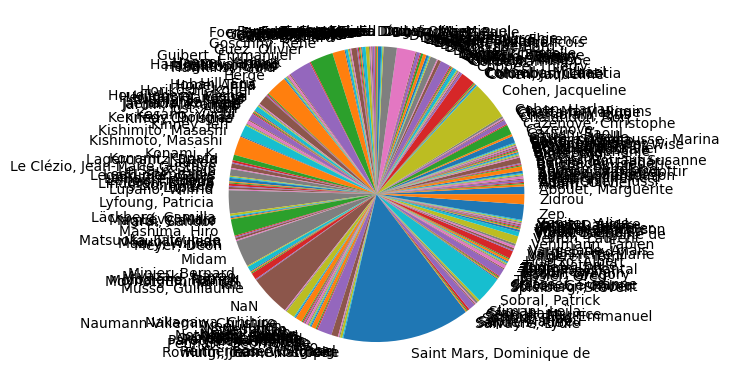

In [17]:
gr_auteurs.size().plot(kind='pie')

In [18]:
gr_auteurs['Prêts'].max().sort_values(ascending = False)

Auteur
Saint Mars, Dominique de    1189
Emberley, Ed                1032
Ferri, Jean-Yves             996
Cohen, Jacqueline            970
Sobral, Patrick              808
                            ... 
Nury, Fabien                 347
Ben Jelloun, Tahar           347
Adler-Olsen, Jussi           346
Crausaz, Anne                345
Tessier, Greg                344
Name: Prêts, Length: 222, dtype: int64

De ces deux commandes on constate que l'auteure Dominique de Saint Mars est en tête du classement que soit pour le nombres d'emprunts en ce début de 2018 et en nombre de titres empruntés. Il s'agit en effet de l'auteure de la série à succès Max et Lili.

![Image max et lily](https://img.lemde.fr/2022/07/18/0/200/4206/4206/664/0/75/0/8f40fd4_1658139515429-max-et-lili-calligram.jpeg)

<Axes: >

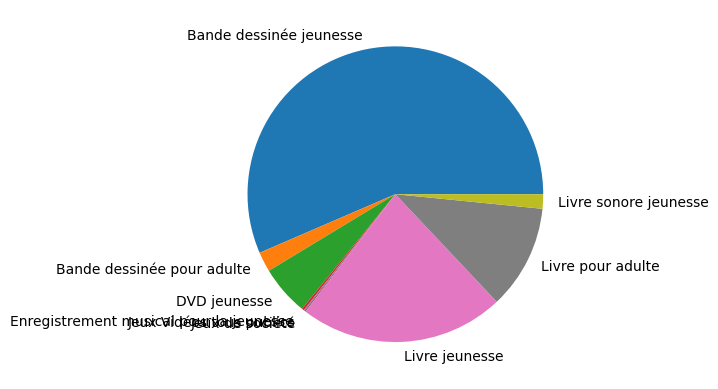

In [19]:
gr_type.size().plot(kind='pie')

On constate à travers ces regroupements que les auteurs sont au nombre de 222 et que les types sont assez divers. Cependant, certaines catégories sont plus empruntés en variaété comme la bande déssinée jeunesse ou **le livre jeunesse.**

Les types principaux empruntés sont donc les **livres** (ce qui peut sembler logique pour une bibliothèque).

## Analyse d'une auteure : Dominique de Saint Mars

Je décide créer une dataframe dédiée à Dominique de Saint Mars que nous avons ci-dessus.

In [20]:
df_ddsm = df2.query("Auteur == 'Saint Mars, Dominique de'")

In [21]:
df_ddsm.shape

(115, 10)

In [22]:
df_ddsm.head()

,Rang,type,Prêts,Titre,Auteur,nb_localisations,nb_prêts_tot,nb_prêts_2017,nb_exemplaires,previous
0,1,Livre jeunesse,1189,Max se trouve trop petit,"Saint Mars, Dominique de",53,3471,1799,135,0
1,2,Livre jeunesse,1101,Lili a trop honte,"Saint Mars, Dominique de",54,7337,1496,136,1
2,3,Livre jeunesse,1079,Max en a marre de sa soeur,"Saint Mars, Dominique de",51,2409,1173,117,2
3,4,Livre jeunesse,1075,Max et Lili cherchent leur métier,"Saint Mars, Dominique de",53,2987,1631,120,3
4,5,Livre jeunesse,1055,Max et Lili en ont marre de se dépêcher,"Saint Mars, Dominique de",51,7526,1468,135,4


In [23]:
df_ddsm.nb_localisations.mean()

43.321739130434786

In [24]:
gr_auteurs['nb_localisations'].mean().sort_values(ascending=False)

Auteur
Thorne, Jack            56.000000
Ferri, Jean-Yves        55.666667
Emberley, Ed            54.000000
Hawkins, Paula          54.000000
Brown, Margaret Wise    54.000000
                          ...    
Erroc                   33.500000
Parthoens, Luc          33.250000
Boyd, William           33.000000
Dutto, Olivier          32.666667
Pica                    28.166667
Name: nb_localisations, Length: 222, dtype: float64

In [25]:
tot_deb_2018 =df_ddsm.Prêts.sum()
print(tot_deb_2018)

87294


In [26]:
tot_2017 = df_ddsm.nb_prêts_2017.sum()
print(tot_2017)
tot = df_ddsm.nb_prêts_tot.sum()
print(tot)

112448
690445


In [27]:
perc_an=(tot_deb_2018/tot_2017)*100
perc_2017 = (tot_2017/tot)*100
perc_deb_2018 = (tot_deb_2018/tot)*100
print(perc_an)
print(perc_2017)
print(perc_deb_2018)

77.63054923164485
16.286308105642014
12.64315043196779


On constate les emprunts de début 2018 représentent environ **78%** des emprunts totaux de 2017. On peut donc s'attendre à ce que cette tendance se poursuive au cours de l'année. Une explication possible est **l'augmentation du nombre de naissances** en Ile de France en 2010 par rapport à 2009, les livres Max et Lily s'adressant à un public assez jeune entre 6 et 10 ans.

On constate également que ces emprunts massifs sont assez récents car l'année 2017 représente à elle seule **16%** des emprunts totaux. La série ayant été débutée en 1992 et la moyenne du nombres de localisation n'étant par particulièrement élevée comparée à celle des autres auteurs, on pourrait donc assister à **une mode Max et Lili.**

## Comparaison livre et bande dessinée

In [28]:
df2.head()

,Rang,type,Prêts,Titre,Auteur,nb_localisations,nb_prêts_tot,nb_prêts_2017,nb_exemplaires,previous
0,1,Livre jeunesse,1189,Max se trouve trop petit,"Saint Mars, Dominique de",53,3471,1799,135,0
1,2,Livre jeunesse,1101,Lili a trop honte,"Saint Mars, Dominique de",54,7337,1496,136,1
2,3,Livre jeunesse,1079,Max en a marre de sa soeur,"Saint Mars, Dominique de",51,2409,1173,117,2
3,4,Livre jeunesse,1075,Max et Lili cherchent leur métier,"Saint Mars, Dominique de",53,2987,1631,120,3
4,5,Livre jeunesse,1055,Max et Lili en ont marre de se dépêcher,"Saint Mars, Dominique de",51,7526,1468,135,4


In [29]:
df2.type.unique()

array(['Livre jeunesse', 'Bande dessinée jeunesse', 'Livre pour adulte',
       'Livre sonore jeunesse', 'DVD jeunesse',
       'Bande dessinée pour adulte', 'Jeux de société',
       'Jeux Vidéos tous publics',
       'Enregistrement musical pour la jeunesse'], dtype=object)

In [30]:
df_bd = gr_type.get_group('Bande dessinée jeunesse')

In [31]:
df_lj = gr_type.get_group('Livre jeunesse')

In [32]:
df_bd.shape

(466, 10)

In [33]:
df_lj.shape

(185, 10)

In [34]:
df_bd.shape[0]/df_lj.shape[0]

2.518918918918919

In [35]:
tot_bd_2018 =df_bd.Prêts.sum()
tot_lj_2018 =df_lj.Prêts.sum()
print(tot_bd_2018)
print(tot_lj_2018)
tot_bd_2018/tot_lj_2018

231530
116591


1.9858308102683742

On constate que la BD est près de **deux fois plus empruntée** que les livres de jeunesse. Néanmoins le nombre de titres disponibles étant **2.5 fois plus grand** dans la BD, on ne peut que sentir que les livres de jeunesses sont tout de même très appréciés.

## Conclusions

Les grands gagnants en volume emprunté des bibliothèques parisiennes sont les livre et bande dessinées de jeunesse. On constate donc que les enfants empruntent plus que les adultes, qui préfèrent sûrement acheter directement un livre en librairie. 

![Image enfant lecture](https://etreparents.com/wp-content/uploads/2019/02/fille-lecture-livre.jpg)

On constate par ailleurs une augmentation du nombre d'emprunts pour certains titres comme la série Max et Lili. ON assiste ainsi grâce à cette dataframe à des pseudos-effets de mode. 

Enfin, la différence entre le nombre d'emprunts pour la jeunesse et ceux pour adultes pourrait s'expliquer par le fait que les enfants ont plus le temps de lire et de se divertir que les adultes dans la vie active.